<a href="https://colab.research.google.com/github/shivanipoosala/BOOT_CAMP-AIML/blob/main/DAY7_SUV_Dataset_BOOTCAMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
df=pd.read_csv('/content/drive/MyDrive/SUV_Purchase.csv')
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


SyntaxError: ignored

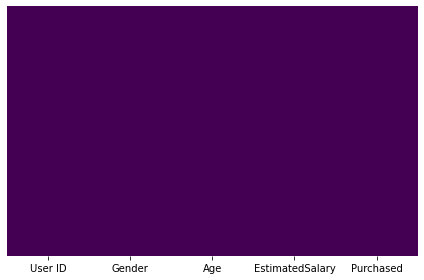

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  
#This function gives heatmap of all NaN values
  plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.tight_layout()
return plt.show()
get_heatmap(df)

In [ ]:
#Data Preprocessing
from sklearn import preprocessing
#Label Encoding
LE= preprocessing.LabelEncoder()
# Fitting it to our dataset
df.Gender = LE.fit_transform(df.Gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
df = df.drop('User ID',axis=1)
df = df.drop('Gender',axis=1)

In [ ]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()
data_scaled=df.iloc[:,:-1].values
data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)
data_scaled.head()

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [ ]:
data_scaled.columns=['Age','EstimatedSalary']

data_scaled.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [ ]:
data_scaled['Purchased'] = df.Purchased
data_scaled = data_scaled[data_scaled['Purchased'].notna()]
data_scaled

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0
...,...,...,...
395,0.797057,-0.844019,1
396,1.274623,-1.372587,1
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0


In [ ]:
x=data_scaled.iloc[:,:-1].values
y=data_scaled.iloc[:,-1:].values

In [ ]:
#spliting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
x_train

array([[ 1.94321462,  2.18056084],
       [ 2.03872775,  0.38930459],
       [-1.30423178, -0.4329114 ],
       [-1.11320552, -1.02020853],
       [ 1.94321462, -0.93211396],
       [ 0.41500455,  0.30121002],
       [ 0.22397829,  0.15438573],
       [ 2.03872775,  1.76945285],
       [ 0.79705706, -0.84401939],
       [ 0.31949142, -0.28608712],
       [ 0.41500455, -0.16862769],
       [-0.0625611 ,  2.23929055],
       [-1.39974491, -0.63846539],
       [-1.20871865, -1.07893824],
       [-1.30423178,  0.41866944],
       [-1.01769239,  0.77104772],
       [-1.39974491, -0.19799255],
       [ 0.98808332, -1.07893824],
       [ 0.98808332,  0.59485858],
       [ 0.41500455,  1.00596657],
       [ 0.60603081, -0.9027491 ],
       [-0.54012675,  1.47580428],
       [ 0.03295203, -0.57973568],
       [-0.54012675,  1.91627713],
       [ 1.37013584, -1.43131652],
       [ 1.46564897,  1.00596657],
       [ 0.12846516, -0.81465453],
       [ 0.03295203, -0.25672226],
       [-0.15807423,

In [ ]:
y_pred=model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


In [ ]:
print("Predicted value for training data:",model.score(x_train,y_train))
print("Training accuracy:",model.score(x_train,y_train)*100)

Predicted value for training data: 0.821875
Training accuracy: 82.1875


In [ ]:
print("Predicted value for testing data:",model.score(x_test,y_test))
print("Testing accuracy:",model.score(x_test,y_test)*100)

Predicted value for testing data: 0.925
Testing accuracy: 92.5


In [ ]:
accuracy=model.score(x,y)*100
print(accuracy)

84.25


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[57  1]
 [ 5 17]]


0.925

In [ ]:
y_train=y_train.flatten()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'map'
  import sys
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


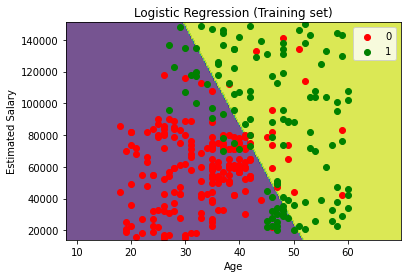

In [ ]:
import matplotlib.pyplot as plt
from matplotlib. colors import ListedColormap
x_set, y_set = sst.inverse_transform(x_train),y_train
x1,x2 = np.meshgrid(np. arange(start = x_set[:, 0].min( )-10,stop= x_set[:, 0].max() + 10, step = 0.25) ,
np.arange(start = x_set[:, 1].min( )- 1000, stop = x_set[:, 1].max ( ) + 1000, step = 0.25))
plt. contourf(x1,x2,model.predict(sst.transform(np.array([x1.ravel(), x2.ravel()]). T) ).reshape (x1. shape ),
alpha = 0.75, map = ListedColormap(('red','green' )) )
plt. xlim(x1.min( ), x1.max( ))
plt.ylim(x2.min( ), x2. max( ))
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set ==j,1],c = ListedColormap(('red','green'))(i),label=j)
plt. title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt. ylabel('Estimated Salary')
plt. legend()
plt.show()

In [ ]:
y_test=y_test.flatten()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'map'
  import sys
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


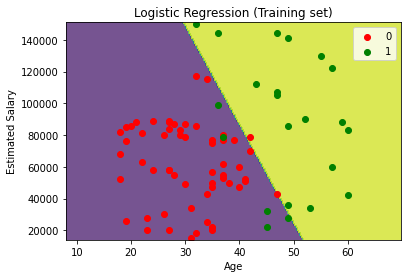

In [ ]:
import matplotlib.pyplot as plt
from matplotlib. colors import ListedColormap
x_set, y_set = sst.inverse_transform(x_test),y_test
x1,x2 = np.meshgrid(np. arange(start = x_set[:, 0].min( )-10,stop= x_set[:, 0].max() + 10, step = 0.25) ,
np.arange(start = x_set[:, 1].min( )- 1000, stop = x_set[:, 1].max ( ) + 1000, step = 0.25))
plt. contourf(x1,x2,model.predict(sst.transform(np.array([x1.ravel(), x2.ravel()]). T) ).reshape (x1. shape ),
alpha = 0.75, map = ListedColormap(('red','green' )) )
plt. xlim(x1.min( ), x1.max( ))
plt.ylim(x2.min( ), x2. max( ))
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set ==j,1],c = ListedColormap(('red','green'))(i),label=j)
plt. title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt. ylabel('Estimated Salary')
plt. legend()
plt.show()